In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
# 生成模拟的加密货币多空策略回报数据（假设有24个策略，每个策略有15个观测值）
np.random.seed(42)
n_assets = 24  # 策略数量
n_observations = 15  # 每个策略的观测值数量/每一周对应的回报

# 模拟数据，生成一个24x15的矩阵，表示24个策略的回报
data = np.random.randn(n_assets, n_observations)

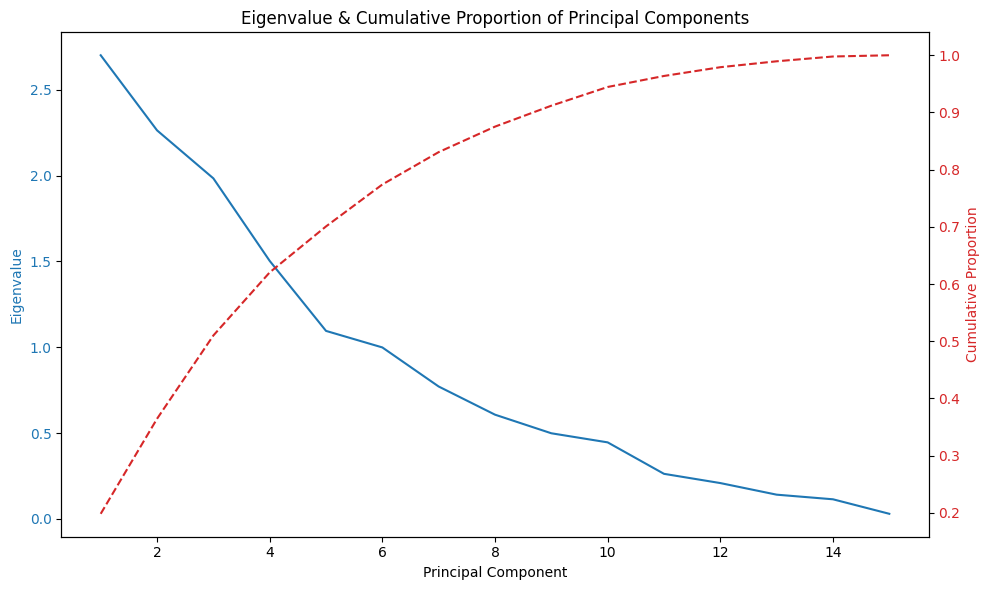

Eigenvalues:
 [2.70115298 2.26365396 1.98394154 1.50308275 1.09519424 0.998857
 0.7711954  0.60709512 0.49873459 0.44573428 0.2624405  0.20859647
 0.14100493 0.11408268 0.02957374]
Cumulative Proportion:
 [0.19825936 0.36440715 0.51002459 0.62034793 0.70073305 0.77404721
 0.83065145 0.87521104 0.91181719 0.94453322 0.96379584 0.97910641
 0.9894559  0.99782935 1.        ]


In [6]:
# 创建PCA模型，进行主成分分析
pca = PCA(n_components=n_observations) # n_components参数指定了要保留的主成分数量
pca.fit(data)

# 获取特征值和累计解释比例
eigenvalues = pca.explained_variance_ # 特征值表示每个主成分解释的方差大小，特征值越大，主成分解释的数据变化越多
# explained_variance_ratio_返回每个主成分解释的方差占总方差的比例，
# np.cumsum计算其累计和。这可以帮助我们了解前几个主成分能解释多少数据的方差
cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)

# 绘制特征值与累计比例图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制特征值
# X轴是主成分的编号，Y轴是特征值。
ax1.plot(range(1, n_observations + 1), eigenvalues, color='tab:blue', label='Eigenvalue')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 创建第二个y轴，绘制累计比例
ax2 = ax1.twinx()
ax2.plot(range(1, n_observations + 1), cumulative_proportion, color='tab:red', linestyle='--', label='Cumulative Proportion')
ax2.set_ylabel('Cumulative Proportion', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 添加标题和图例
plt.title('Eigenvalue & Cumulative Proportion of Principal Components')
fig.tight_layout()
plt.show()

# 输出主成分分析的解释比例和特征值
print("Eigenvalues:\n", eigenvalues)
print("Cumulative Proportion:\n", cumulative_proportion)